#Statistic lab Ex4

*By:\
Ariel Ginensky: 312297559\
Ron Tzidon 315313577\
Shahar Zismanovich 205518905*

##Question 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import ssl
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline

In [28]:
df = pd.read_csv('expb.csv')
df = df[df.בזב != 0]
p_names = ['מחל',  'פה','שס','ב','כן','אמת','ד','ל','ג','מרצ','ט','עם','ום']
dict = {'מחל': 'הליכוד', 'פה': 'יש עתיד', 'כן': 'המחנה הממלכתי',
        'ב': 'הבית היהודי', 'אמת': 'עבודה', 'ג': 'יהדות התורה', "ל":"ישראל ביתנו",
          "ט":"הציונות הדתית", "ד":"בלד", "עם":"הרשימה הערבית המאוחדת", "ום":"חדש תעל"}
new_df = df.loc[:,p_names]
new_df.rename(columns=dict,
              inplace=True)

new_df

,הליכוד,יש עתיד,שס,הבית היהודי,המחנה הממלכתי,עבודה,בלד,ישראל ביתנו,יהדות התורה,מרצ,הציונות הדתית,הרשימה הערבית המאוחדת,חדש תעל
0,9,0,0,0,1,0,4,0,0,0,0,132,21
1,1,0,0,0,0,1,0,0,0,0,0,90,2
2,0,1,2,0,3,0,0,0,0,0,0,150,12
3,2,0,2,0,1,0,0,0,0,0,0,96,3
4,11,5,0,0,0,1,171,0,0,10,1,110,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12540,83,9,12,66,19,4,0,1,1,1,155,0,1
12541,79,16,3,66,19,6,0,15,3,2,206,1,0
12542,28,0,0,0,0,0,0,0,0,1,0,42,1
12543,143,1,1,0,0,1,6,0,0,2,0,87,1


We built a function that lets us use the two estimation ways we learnd in class

In [29]:
def est_correction(df, type):
    if type == "Alpha":
        alpha_inv = df['בזב']/df['כשרים']
        alpha1 = []
        for i in new_df.columns:
            alpha1.append( ((new_df[i] * alpha_inv) / df['בזב'].sum()).sum())

        return np.array(alpha1)


    if type == "Beta":
        N_t = new_df.T
        N_t_N_inv = np.linalg.inv(np.dot(N_t, new_df))
        bazab = df['בזב']
        beta_inv = np.dot(np.dot(N_t_N_inv,N_t), bazab)
        diag = np.diag((beta_inv).tolist())
        sfira = np.dot(np.dot(np.ones(len(df['בזב'])), new_df), diag)
        q2 = pd.DataFrame(sfira/sum(sfira))
        return q2




In [30]:
est_correction(df,"Alpha")

array([0.23197904, 0.17305715, 0.07963388, 0.01087395, 0.08613541,
       0.03478212, 0.03691337, 0.04730406, 0.05535515, 0.03205453,
       0.0980723 , 0.05206378, 0.04745704])

In [31]:
est_correction(df,"Beta")

,0
0,0.265016
1,0.114711
2,0.069178
3,0.012746
4,0.053173
5,0.058578
6,0.040276
7,0.110646
8,0.054116
9,0.050533


We will create the 3 frequencies we want to compare

In [32]:

voting_rate = new_df.sum()/df["כשרים"].sum()
# compare_df = pd.DataFrame({'Alpha': np.array(est_correction(df,"Alpha")), 'Beta': np.array(est_correction(df,"Beta")), 'Real':np.array(voting_rate)})
compare_df = pd.DataFrame(np.array(est_correction(df,"Alpha")))
compare_df['Beta'] = np.array(est_correction(df,"Beta"))
compare_df['Real'] = np.array(voting_rate)
compare_df['Party'] = new_df.columns
compare_df = compare_df.rename(columns={0:'Alpha'})



We orgenized the types of estimators with the real results in one data frame in oeder to have a clean look on the diffrences.

Text(0, 0.5, 'Frequency')

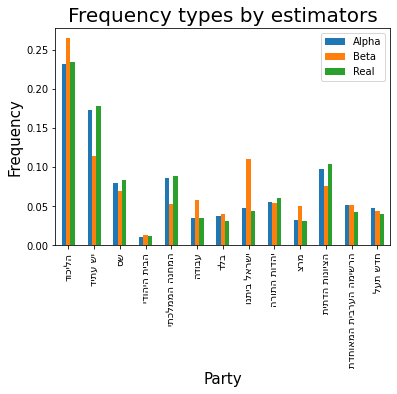

In [33]:
compare_df['Party'] = compare_df['Party'].apply(lambda x : x[::-1])
compare_df.plot(x="Party", y = ['Alpha', 'Beta', 'Real'], kind="bar")
plt.title('Frequency types by estimators', fontsize=20)
plt.xlabel('Party', fontsize=15)
plt.ylabel('Frequency', fontsize=15)



We presented all the parties that got over the threshold of 3.25%. As one can see, there are differences between the types of estimators. that can show us the importance of the estimate type when predicting results.

In [34]:
compare_df['Party'] = compare_df['Party'].apply(lambda x : x[::-1])
compare_df[compare_df['Alpha'] >= 0.0325].drop(['Beta','Real'], axis = 1)
compare_df[compare_df['Beta'] >= 0.0325].drop(['Alpha','Real'], axis = 1)
compare_df[compare_df['Real'] >= 0.0325].drop(['Alpha','Beta'], axis = 1)



,Real,Party
0,0.233963,הליכוד
1,0.178762,יש עתיד
2,0.083972,שס
4,0.089093,המחנה הממלכתי
5,0.035416,עבודה
7,0.043551,ישראל ביתנו
8,0.061089,יהדות התורה
10,0.103479,הציונות הדתית
11,0.043203,הרשימה הערבית המאוחדת
12,0.039690,חדש תעל


In [35]:
new_df.sum()/df["כשרים"].sum()

הליכוד                   0.233963
יש עתיד                  0.178762
שס                       0.083972
הבית היהודי              0.011613
המחנה הממלכתי            0.089093
עבודה                    0.035416
בלד                      0.030494
ישראל ביתנו              0.043551
יהדות התורה              0.061089
מרצ                      0.031687
הציונות הדתית            0.103479
הרשימה הערבית המאוחדת    0.043203
חדש תעל                  0.039690
dtype: float64

##Question 2

###a)

Here we are creating a function that simulates the voting results, based on the binomal model we learned in class. 

In [36]:
def voting_simulation(n,v):
  data = np.random.binomial(n, v)
  sim_df = pd.DataFrame(data, columns = list(new_df.columns))
  return(sim_df)

## b)

*$\underline{\tilde{n_{i,j}}}$:*\
Creating data frame representing $\tilde{n_{i,j}}$ by the folllowing calculation:

$\tilde{n_{i,j}} =$ number of legal votes, divided by the number people with right to vote, times the number of votes per ballot. \

Finally, we will round each element in the data frame. 





In [37]:
total_voters_num = df['בזב'].sum()

legal_voters_num = df['כשרים'].sum()

voters_ratio = total_voters_num/legal_voters_num

n_tilde = new_df.to_numpy()*voters_ratio

n_tilde = n_tilde.round(0).astype(int)


**i) $V_{i,j} = \alpha_{i}$:**\
Creating a data frame for $V_{i,j}$ when  $V_{i,j} = \alpha_{i}$\
$\alpha_{i} = \frac{n_i}{\tilde{n_{i}}}$\
$\alpha_{i}$ is the number of legal votes, divided by number of people with the right to vote, per ballot.


In [38]:
alpha_vec = df["כשרים"]/df["בזב"]
m = new_df.shape[1]
v_alpha = pd.concat([alpha_vec] * m, axis=1, ignore_index=True).to_numpy()
v_alpha


array([[0.29649123, 0.29649123, 0.29649123, ..., 0.29649123, 0.29649123,
        0.29649123],
       [0.16666667, 0.16666667, 0.16666667, ..., 0.16666667, 0.16666667,
        0.16666667],
       [0.29473684, 0.29473684, 0.29473684, ..., 0.29473684, 0.29473684,
        0.29473684],
       ...,
       [0.12371134, 0.12371134, 0.12371134, ..., 0.12371134, 0.12371134,
        0.12371134],
       [0.37384615, 0.37384615, 0.37384615, ..., 0.37384615, 0.37384615,
        0.37384615],
       [0.80194805, 0.80194805, 0.80194805, ..., 0.80194805, 0.80194805,
        0.80194805]])

In [51]:
len(v_alpha)

11707

*ii) $V_{i,j} = \beta_{i}$:*


In [39]:
beta_vec = pd.Series(np.arange(0.2,0.8,0.05))
r = new_df.shape[0]
v_beta = pd.concat([beta_vec] * r, axis=1, ignore_index = True).T.to_numpy()
v_beta

array([[0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ],
       [0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ],
       [0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ],
       ...,
       [0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ],
       [0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ],
       [0.2 , 0.25, 0.3 , ..., 0.7 , 0.75, 0.8 ]])

Simulating for  $V_{i,j} = \alpha_{i}$, $V_{i,j} = \beta_{j}$

A function that runs fifty simulation of the votes per ballot, and returns the q matrice for fifty simulations.

In [40]:
def simulation_estimators(v):
  q_df = pd.DataFrame(columns = list(new_df.columns))
  for i in range(50):
    a = voting_simulation(n_tilde, v_alpha)
    a_total_voters = 1/ a.sum().sum()
    q_a = pd.Series(a.sum()*a_total_voters)
    q_df = q_df.append(q_a, ignore_index=True)
  return(q_df)


The q matrice for the fifty simiulation with alpha as the estimator.

In [41]:
q_a2 = simulation_estimators(v_alpha)
q_a2

,הליכוד,יש עתיד,שס,הבית היהודי,המחנה הממלכתי,עבודה,בלד,ישראל ביתנו,יהדות התורה,מרצ,הציונות הדתית,הרשימה הערבית המאוחדת,חדש תעל
0,0.237639,0.185004,0.089082,0.012414,0.092509,0.036277,0.025783,0.040743,0.068564,0.031625,0.109545,0.036811,0.034004
1,0.237570,0.185095,0.089101,0.012437,0.092502,0.036236,0.025791,0.040843,0.068490,0.031642,0.109459,0.036838,0.033995
2,0.237479,0.185124,0.089202,0.012441,0.092450,0.036300,0.025717,0.040811,0.068572,0.031586,0.109544,0.036804,0.033971
3,0.237467,0.185233,0.089113,0.012475,0.092503,0.036306,0.025676,0.040812,0.068494,0.031673,0.109605,0.036741,0.033901
4,0.237482,0.185140,0.089097,0.012450,0.092538,0.036266,0.025744,0.040703,0.068443,0.031645,0.109610,0.036840,0.034042
5,0.237619,0.185182,0.089184,0.012463,0.092485,0.036246,0.025795,0.040746,0.068491,0.031669,0.109340,0.036781,0.033998
6,0.237596,0.185174,0.089024,0.012462,0.092552,0.036314,0.025697,0.040713,0.068468,0.031653,0.109641,0.036717,0.033989
7,0.237349,0.185079,0.089175,0.012465,0.092718,0.036183,0.025790,0.040689,0.068486,0.031621,0.109621,0.036842,0.033983
8,0.237435,0.185295,0.089089,0.012483,0.092507,0.036285,0.025732,0.040852,0.068436,0.031591,0.109522,0.036798,0.033975
9,0.237598,0.185117,0.089101,0.012458,0.092653,0.036237,0.025801,0.040765,0.068516,0.031617,0.109388,0.036728,0.034023


The q matrice for the fifty simiulation with beta as the estimator.

In [42]:
q_b2 = simulation_estimators(v_beta)
q_b2

,הליכוד,יש עתיד,שס,הבית היהודי,המחנה הממלכתי,עבודה,בלד,ישראל ביתנו,יהדות התורה,מרצ,הציונות הדתית,הרשימה הערבית המאוחדת,חדש תעל
0,0.237422,0.185284,0.089226,0.012473,0.092560,0.036204,0.025745,0.040740,0.068498,0.031611,0.109492,0.036768,0.033976
1,0.237550,0.185213,0.089130,0.012442,0.092483,0.036267,0.025730,0.040783,0.068491,0.031642,0.109444,0.036841,0.033984
2,0.237593,0.185265,0.089101,0.012418,0.092612,0.036280,0.025700,0.040675,0.068546,0.031607,0.109631,0.036614,0.033958
3,0.237217,0.185402,0.089101,0.012447,0.092577,0.036222,0.025770,0.040825,0.068576,0.031684,0.109482,0.036676,0.034022
4,0.237419,0.185319,0.089087,0.012454,0.092667,0.036252,0.025730,0.040797,0.068515,0.031648,0.109445,0.036713,0.033955
5,0.237519,0.185057,0.089215,0.012450,0.092553,0.036204,0.025758,0.040719,0.068506,0.031636,0.109521,0.036892,0.033970
6,0.237653,0.185140,0.088991,0.012401,0.092555,0.036358,0.025699,0.040701,0.068548,0.031677,0.109589,0.036674,0.034014
7,0.237496,0.185195,0.089133,0.012461,0.092503,0.036309,0.025741,0.040798,0.068565,0.031574,0.109507,0.036681,0.034038
8,0.237538,0.185284,0.089047,0.012486,0.092524,0.036218,0.025775,0.040743,0.068466,0.031672,0.109510,0.036786,0.033952
9,0.237879,0.185158,0.089129,0.012432,0.092530,0.036263,0.025745,0.040599,0.068472,0.031620,0.109426,0.036763,0.033985


##c)

Four estimators to compare the reasults of the simulations.

In [43]:
alpha = pd.Series(est_correction(df,"Alpha"))
beta = est_correction(df,"Beta")

v_alpha1 = pd.concat([alpha] * m, axis=1, ignore_index=True).to_numpy()

v_beta1 = pd.concat([beta] * r, axis=1, ignore_index = True).T.to_numpy()

q_a1 = simulation_estimators(v_alpha1)

q_b1 = simulation_estimators(v_beta1)



Function that recieves a q estimator and returns a 13*4 matrice with the: "Expected Value","VAR","BIAS","MSE".

In [44]:
def estimators_comparison(q):
  df = pd.DataFrame(columns = ["Expected Value","VAR","BIAS","MSE"], index = list(new_df.columns))
  df["Expected Value"] = q.mean()
  df["VAR"] = q.var()
  df["BIAS"] = df["Expected Value"] - np.mean(voting_rate)
  df["MSE"] = df["BIAS"]**2 + df["VAR"]
  return(df)


A 13*4 matrice for the q estimator that we get from using alpha in question 1.

In [45]:
estimators_comparison(q_a1)


,Expected Value,VAR,BIAS,MSE
הליכוד,0.237552,1.010503e-08,0.161705,0.026149
יש עתיד,0.185228,1.262364e-08,0.109381,0.011964
שס,0.089113,6.952283e-09,0.013266,0.000176
הבית היהודי,0.012455,8.664253e-10,-0.063392,0.004019
המחנה הממלכתי,0.092528,4.175061e-09,0.016681,0.000278
עבודה,0.036240,2.992848e-09,-0.039607,0.001569
בלד,0.025732,2.183523e-09,-0.050115,0.002512
ישראל ביתנו,0.040754,3.479527e-09,-0.035093,0.001232
יהדות התורה,0.068499,4.757506e-09,-0.007348,0.000054
מרצ,0.031636,2.170531e-09,-0.044211,0.001955


A 13*4 matrice for the q estimator that we get from using alpha in question 2.

In [46]:
estimators_comparison(q_a2)


,Expected Value,VAR,BIAS,MSE
הליכוד,0.237521,1.142095e-08,0.161674,0.026139
יש עתיד,0.185209,9.333113e-09,0.109362,0.011960
שס,0.089127,6.443574e-09,0.013280,0.000176
הבית היהודי,0.012460,7.841272e-10,-0.063387,0.004018
המחנה הממלכתי,0.092532,6.676428e-09,0.016686,0.000278
עבודה,0.036249,1.918859e-09,-0.039598,0.001568
בלד,0.025739,2.001803e-09,-0.050108,0.002511
ישראל ביתנו,0.040754,2.379336e-09,-0.035093,0.001232
יהדות התורה,0.068489,2.217975e-09,-0.007358,0.000054
מרצ,0.031638,3.477988e-09,-0.044209,0.001954


A 13*4 matrice for the q estimator that we get from using beta in question 1.

In [47]:
estimators_comparison(q_b1)

,Expected Value,VAR,BIAS,MSE
הליכוד,0.237584,1.643025e-08,0.161737,0.026159
יש עתיד,0.185230,1.575720e-08,0.109383,0.011965
שס,0.089095,4.601930e-09,0.013248,0.000176
הבית היהודי,0.012463,8.349715e-10,-0.063384,0.004018
המחנה הממלכתי,0.092511,3.508613e-09,0.016665,0.000278
עבודה,0.036252,2.149916e-09,-0.039595,0.001568
בלד,0.025731,2.775534e-09,-0.050116,0.002512
ישראל ביתנו,0.040772,3.292384e-09,-0.035075,0.001230
יהדות התורה,0.068493,4.154434e-09,-0.007354,0.000054
מרצ,0.031630,2.355901e-09,-0.044217,0.001955


A 13*4 matrice for the q estimator that we get from using beta in question 2.

In [48]:
estimators_comparison(q_b2)

,Expected Value,VAR,BIAS,MSE
הליכוד,0.237558,1.634108e-08,0.161712,0.026151
יש עתיד,0.185228,1.256914e-08,0.109381,0.011964
שס,0.089120,5.738895e-09,0.013273,0.000176
הבית היהודי,0.012459,8.400550e-10,-0.063388,0.004018
המחנה הממלכתי,0.092518,3.878711e-09,0.016672,0.000278
עבודה,0.036250,2.524592e-09,-0.039597,0.001568
בלד,0.025727,3.140086e-09,-0.050120,0.002512
ישראל ביתנו,0.040753,3.041337e-09,-0.035094,0.001232
יהדות התורה,0.068495,2.898329e-09,-0.007352,0.000054
מרצ,0.031633,1.836509e-09,-0.044214,0.001955


In [49]:
real_voting_prop = pd.DataFrame(columns = list(new_df.columns))
for i, row in new_df.iterrows():
  row = row / df._get_value(i,'בזב')
  real_voting_prop = real_voting_prop.append(row, ignore_index=True)

real_voting_prop

,הליכוד,יש עתיד,שס,הבית היהודי,המחנה הממלכתי,עבודה,בלד,ישראל ביתנו,יהדות התורה,מרצ,הציונות הדתית,הרשימה הערבית המאוחדת,חדש תעל
0,0.015789,0.000000,0.000000,0.000000,0.001754,0.000000,0.007018,0.000000,0.000000,0.000000,0.000000,0.231579,0.036842
1,0.001754,0.000000,0.000000,0.000000,0.000000,0.001754,0.000000,0.000000,0.000000,0.000000,0.000000,0.157895,0.003509
2,0.000000,0.001754,0.003509,0.000000,0.005263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.263158,0.021053
3,0.003515,0.000000,0.003515,0.000000,0.001757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.168717,0.005272
4,0.018395,0.008361,0.000000,0.000000,0.000000,0.001672,0.285953,0.000000,0.000000,0.016722,0.001672,0.183946,0.071906
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11702,0.166000,0.018000,0.024000,0.132000,0.038000,0.008000,0.000000,0.002000,0.002000,0.002000,0.310000,0.000000,0.002000
11703,0.135739,0.027491,0.005155,0.113402,0.032646,0.010309,0.000000,0.025773,0.005155,0.003436,0.353952,0.001718,0.000000
11704,0.048110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001718,0.000000,0.072165,0.001718
11705,0.220000,0.001538,0.001538,0.000000,0.000000,0.001538,0.009231,0.000000,0.000000,0.003077,0.000000,0.133846,0.001538


We creatd a data frame with the expected value and var of the real results of the elections. We used this to compare our four simulations.
We noticed that all four of the simulations conclude with very similar results for all. This means that the different estimators for $V_{i,j} don't have a great effect on the simulation as we would expect. but rather the simulation itself has a greater effect on the results.

In [50]:
real_res_analysis_df = pd.DataFrame(columns = ["Expected Value","VAR"], index = list(new_df.columns))

real_res_analysis_df["Expected Value"] = real_voting_prop.mean()
real_res_analysis_df["VAR"] = real_voting_prop.var()

real_res_analysis_df

,Expected Value,VAR
הליכוד,0.148179,0.010879
יש עתיד,0.113536,0.010698
שס,0.052377,0.005394
הבית היהודי,0.007560,0.000285
המחנה הממלכתי,0.057008,0.002229
עבודה,0.023179,0.000871
בלד,0.019292,0.002866
ישראל ביתנו,0.027272,0.000962
יהדות התורה,0.037323,0.012892
מרצ,0.020523,0.000976
